# K Means Clustering

Problem Statement:

Refer Mall Customer Segmentation Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using K means clustering classifier and form appropriate clusters. Analyse the performance of model.<br>

### Load data

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv('mall segmentation.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Data Description

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [35]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No `NAN` values in dataset

In [36]:
df.duplicated().sum()

0

In [37]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


No duplicate values in dataset

Converting `Gender` column `Female` to `1` and `Male` to `0`m

In [38]:
df['Gender'] = df.Gender.replace({'Female':1,'Male':0})

In [39]:
#df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


<Axes: >

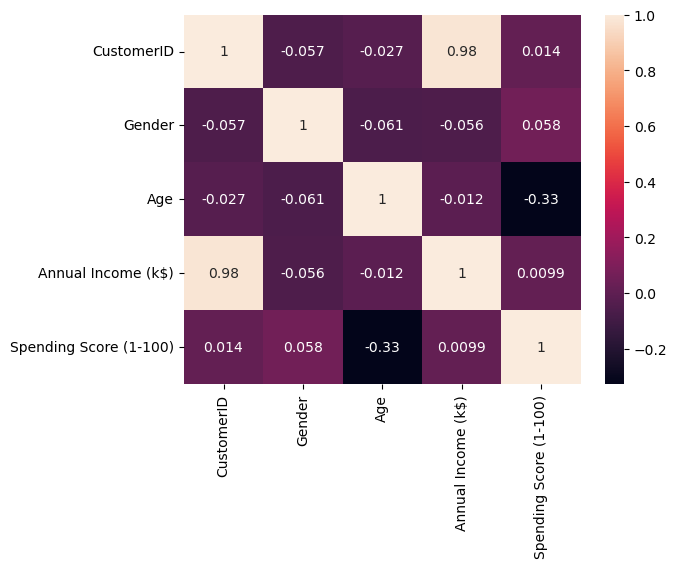

In [8]:
sns.heatmap(df.corr(),annot = True)

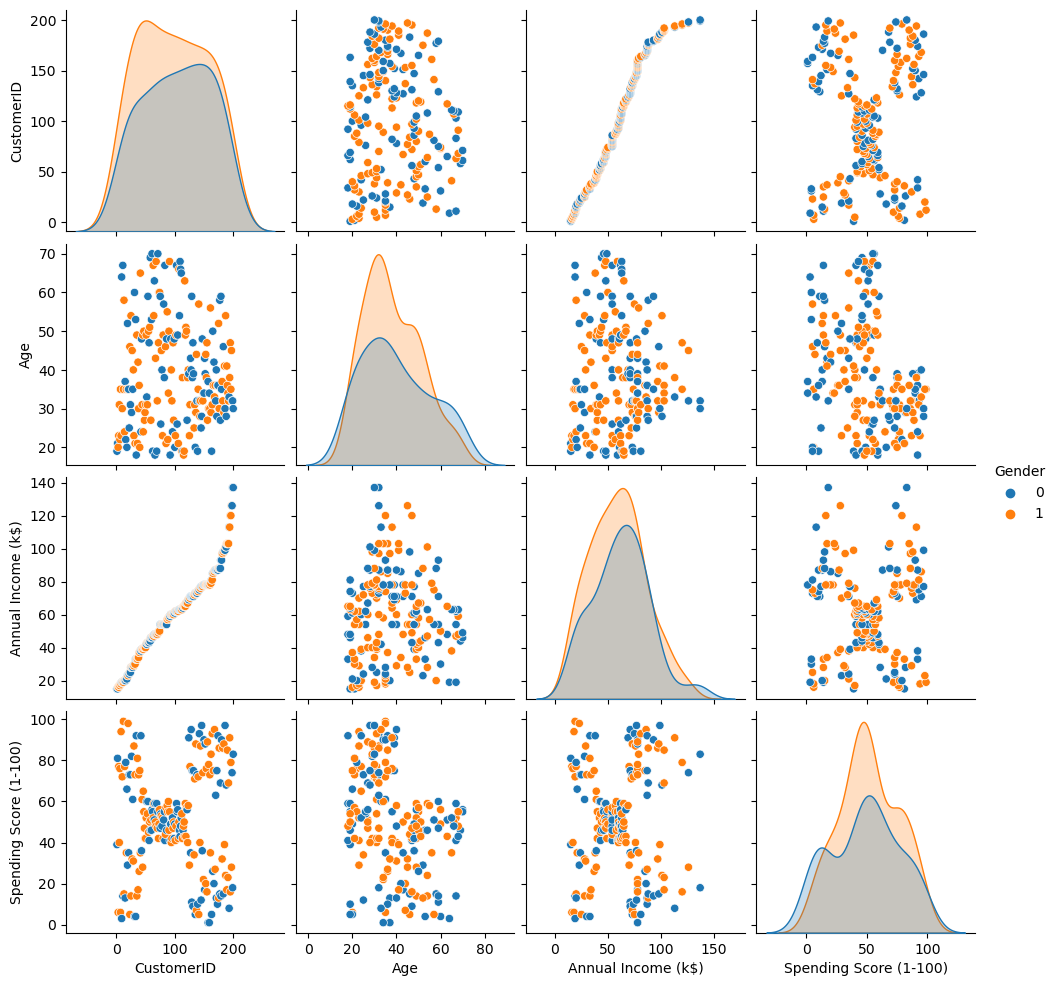

In [9]:
sns.pairplot(data = df, hue = 'Gender');

In [17]:
sns.scatterplot?

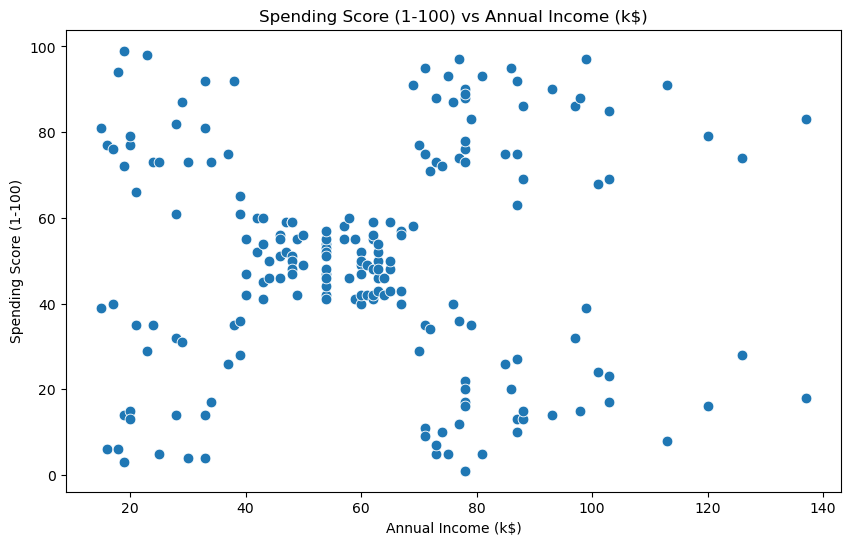

In [58]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [51]:
df.iloc[:,:]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,0,19,15,39,0
1,2,0,21,15,81,4
2,3,1,20,16,6,0
3,4,1,23,16,77,4
4,5,1,31,17,40,0
...,...,...,...,...,...,...
195,196,1,35,120,79,1
196,197,1,45,126,28,3
197,198,0,32,126,74,1
198,199,0,32,137,18,3


In [63]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)

In [64]:
wcss

[309209.18,
 213229.0199488491,
 143504.1862841908,
 104495.44113167534,
 75530.42656469136,
 58358.50869831923,
 51142.27963849017,
 44369.19963849017,
 40634.72935397935,
 37113.82408591409]

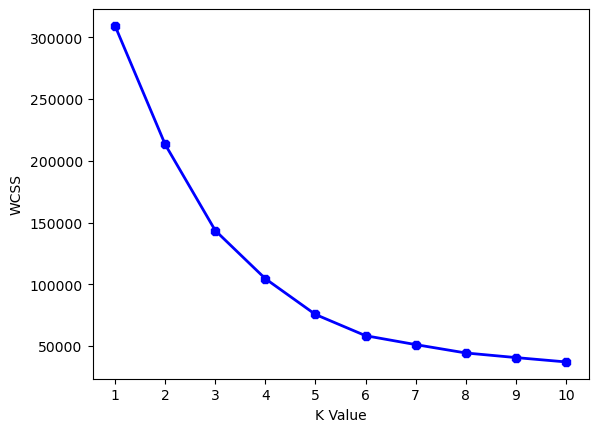

In [65]:
plt.plot(range(1, 11), wcss, linewidth = 2, color = "blue", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()

Above plot we got our optimal k-value which is `5`

In [66]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
clusters = km.fit_predict(df.iloc[:,1:])
df['label'] = clusters

In [67]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,0,19,15,39,0
1,2,0,21,15,81,3
2,3,1,20,16,6,0
3,4,1,23,16,77,3
4,5,1,31,17,40,0
...,...,...,...,...,...,...
195,196,1,35,120,79,1
196,197,1,45,126,28,4
197,198,0,32,126,74,1
198,199,0,32,137,18,4


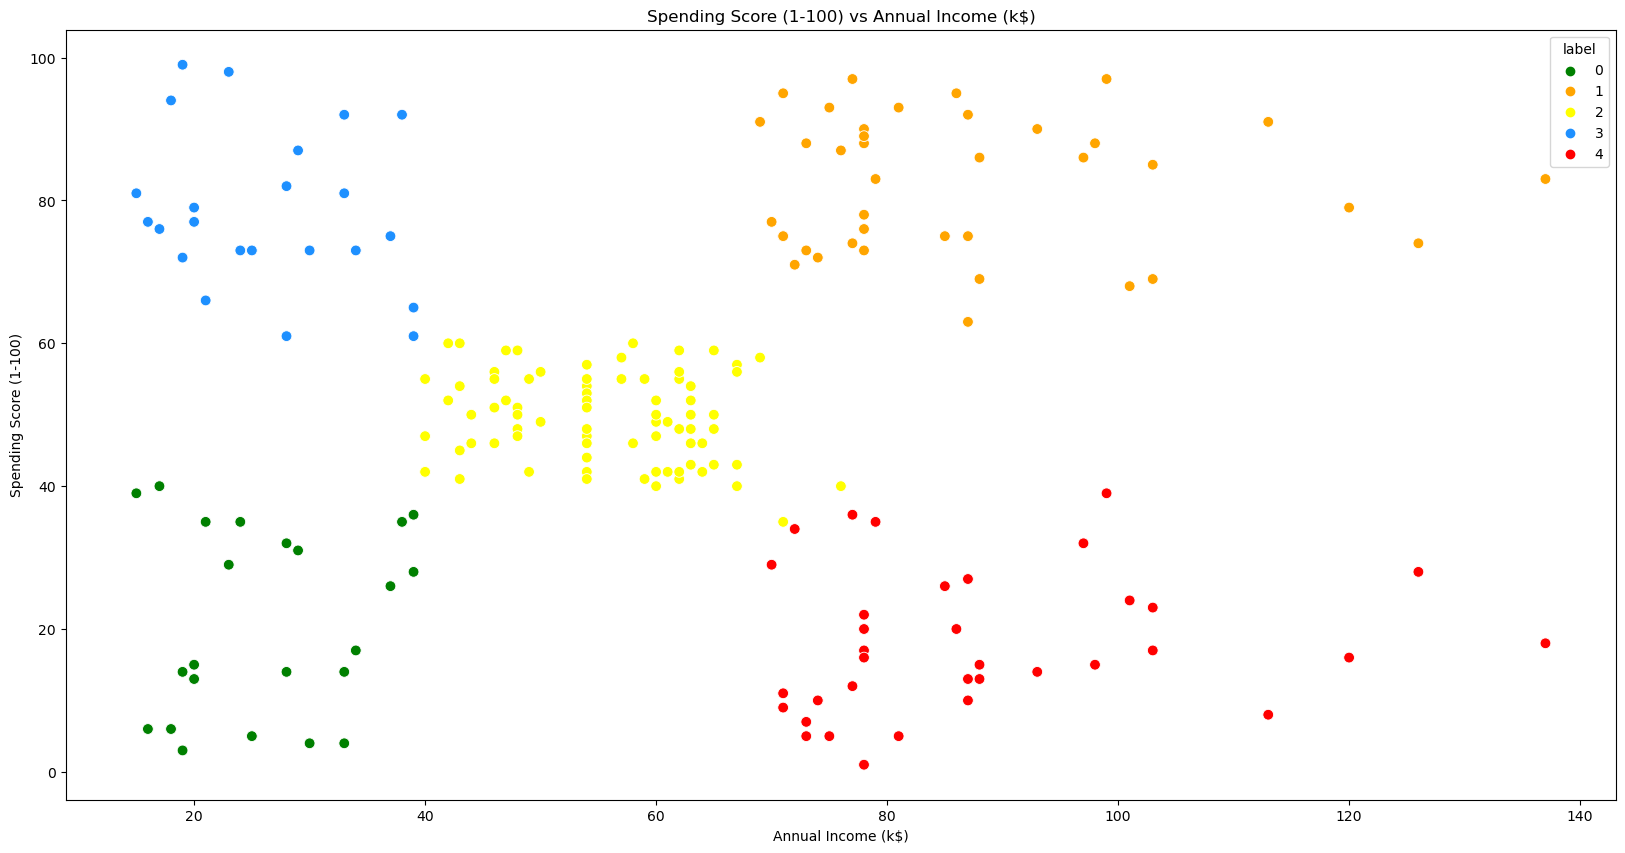

In [70]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'Annual Income (k$)',
                y = 'Spending Score (1-100)',
                hue = "label", 
                palette = ['green','orange','yellow','dodgerblue','red'], 
                legend = 'full', 
                data = df ,
                s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

We can clearly see that 5 different clusters have been formed from the data.

The 'red' cluster is the customers with the least income and least spending score, similarly, the 'yellow' cluster is the customers with the most income and most spending score.